In [82]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr # to read .rds files

In [83]:
path_in = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/"


In [84]:

fnames={}

case_id = "Bharat_AW_1PFTallom_r240222_AgBgW_spins_daily_test"
case_id = "Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily"
sites= ("US-ORN", "US-DUK")
for site in sites:
    fnames[f"{case_id}_{site}_spins"] = f"{path_in}{case_id}_processed/{case_id}_{site}_spins.nc"
    #if site == "US-ORN":
    #    fnames[f"{case_id}_{site}_spins"] = f"{path_in}{case_id}_processed/concatenated_Bharat_H_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_I1850ELMFATES_ad_spinup.nc"
    


In [85]:
 fnames

{'Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_spins': '/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_processed/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_spins.nc',
 'Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-DUK_spins': '/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_processed/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-DUK_spins.nc'}

In [86]:
fnames

{'Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_spins': '/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_processed/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_spins.nc',
 'Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-DUK_spins': '/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_processed/Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-DUK_spins.nc'}

In [87]:
ds = {}
for idx, key in enumerate(fnames.keys()):
    print (key)
    #ds[key] = xr.open_mfdataset(fnames[key],decode_times=True)
    ds[key] = xr.open_mfdataset(fnames[key])
    ds[key] = xr.open_mfdataset(fnames[key], decode_times=False) # inorder to read the "FATES_DAYSINCE_COLDLEAFOFF". because days are interpreted differeny by xarry
    
    
#for idx, key in enumerate(ds.keys()):
#    ds[key]['time'] =  pd.to_datetime(ds[key].time.values.astype(str))

Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-ORN_spins
Bharat_AW_1PFTallom_r240228_AgBgW_spins_daily_US-DUK_spins


In [88]:
# How long do you want the simulation plots?
max_r_years = 40


transpiration beta factor
transpiration beta factor


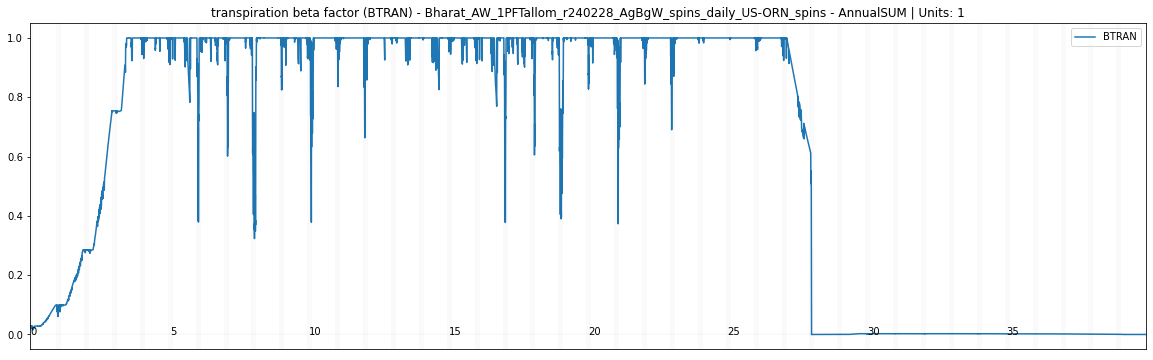

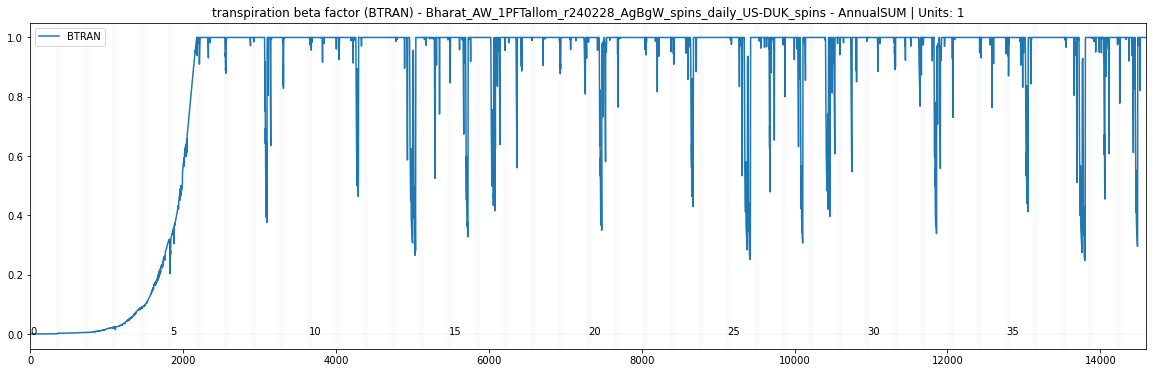

In [89]:

vars = (
        "BTRAN",
        #"FATES_AUTORESP_USTORY"
       )

for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

gross primary production in kg carbon per m2 per second
net primary production in kg carbon per m2 per second
autotrophic respiration in kg carbon per m2 per second
gross primary production in kg carbon per m2 per second
net primary production in kg carbon per m2 per second
autotrophic respiration in kg carbon per m2 per second


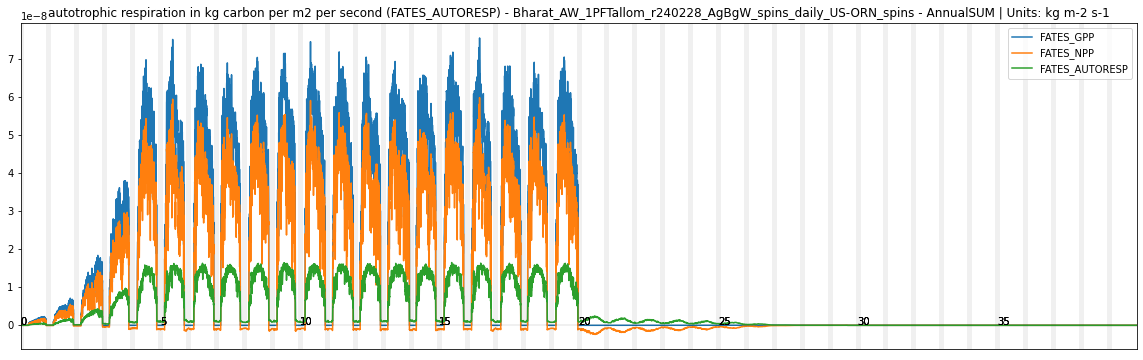

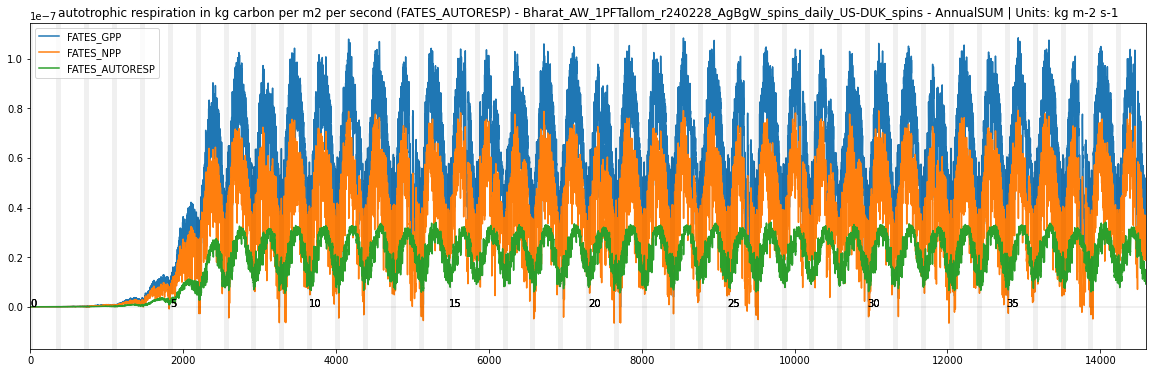

In [90]:
vars = ("FATES_GPP",
        "FATES_NPP",
        "FATES_AUTORESP",
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

total projected leaf area index
total projected leaf area index


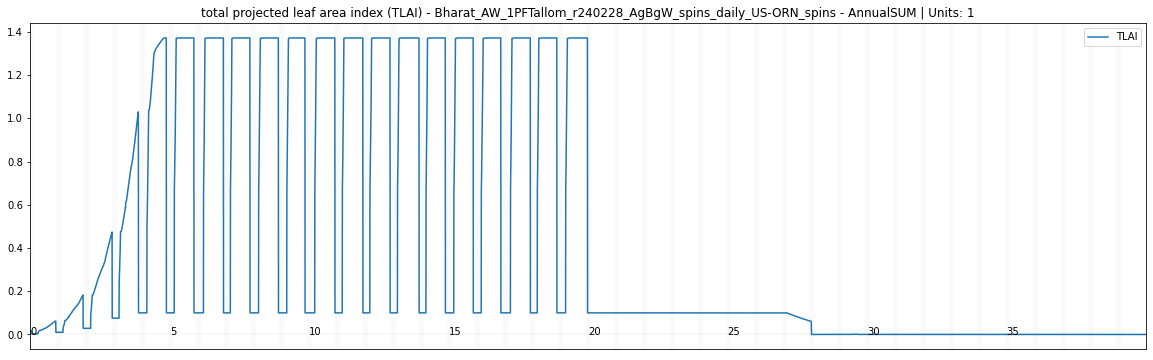

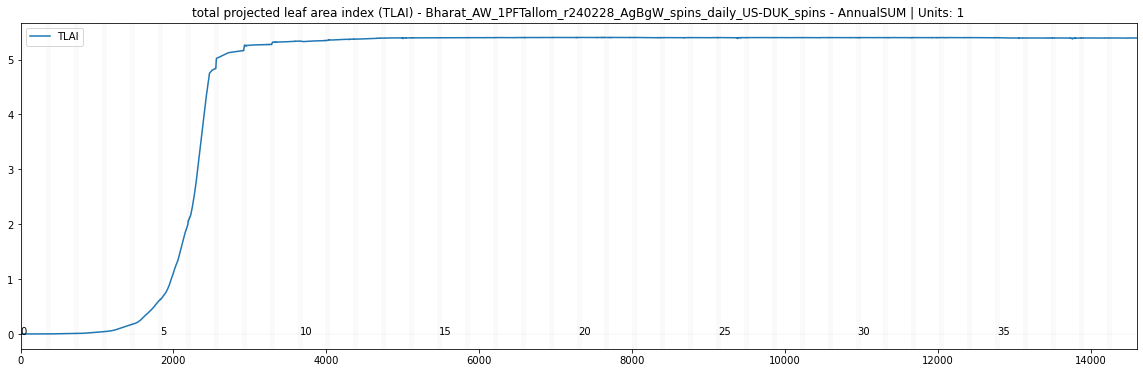

In [91]:
vars = (
        "TLAI",
        #"FATES_AUTORESP_USTORY"
       )
for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

total biomass in live plant fine roots in kg carbon per m2
total biomass in live plant leaves in kg carbon per m2
total biomass in live plant storage in kg carbon per m2 land area
total biomass in live plant fine roots in kg carbon per m2
total biomass in live plant leaves in kg carbon per m2
total biomass in live plant storage in kg carbon per m2 land area


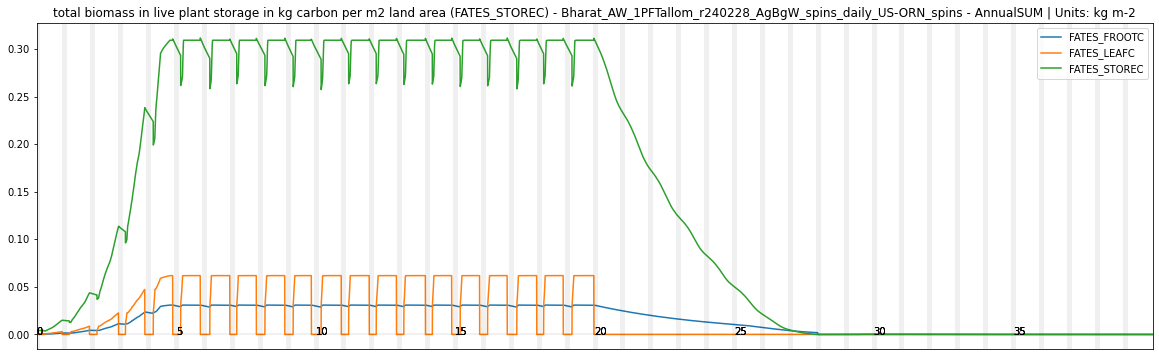

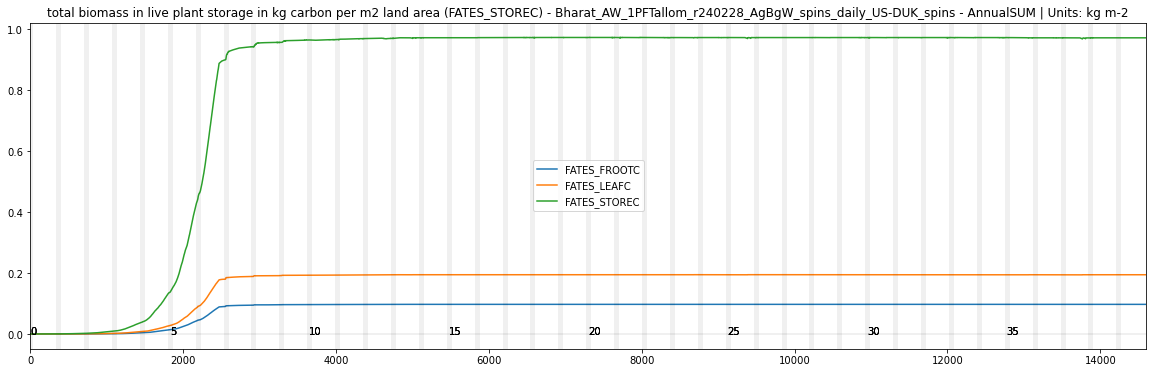

In [92]:
vars = (
            "FATES_FROOTC",
        "FATES_LEAFC",
        "FATES_STOREC",
    #"FATES_SAPWOODC",
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

site-level days elapsed since cold leaf drop
site-level days elapsed since cold leaf flush
site-level days elapsed since cold leaf drop
site-level days elapsed since cold leaf flush


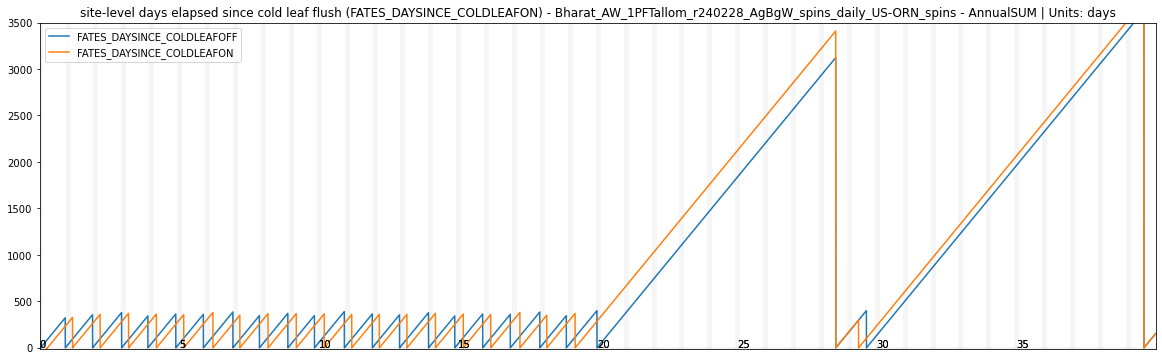

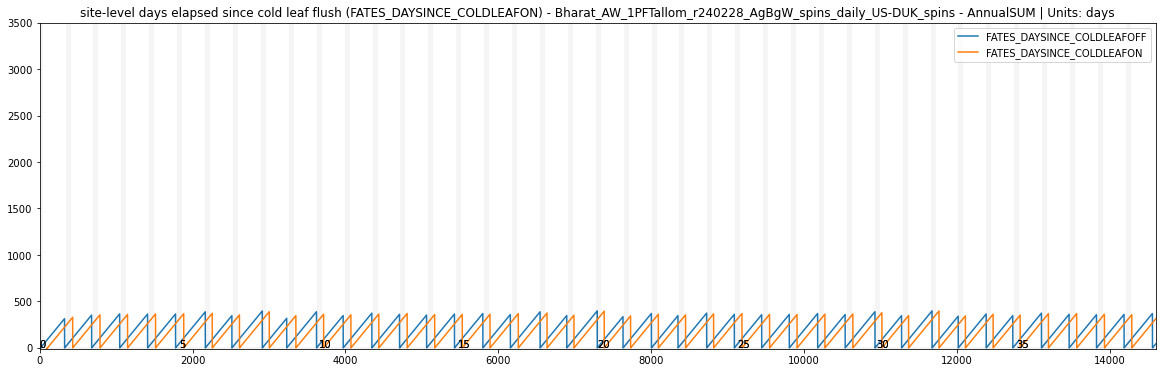

In [93]:
vars = ("FATES_DAYSINCE_COLDLEAFOFF",
        "FATES_DAYSINCE_COLDLEAFON",
        #"FATES_AUTORESP_USTORY"
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            #plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: days")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            plt.ylim(-10,3500)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

site-level days elapsed since cold leaf drop
site-level days elapsed since cold leaf flush
site-level days elapsed since cold leaf drop
site-level days elapsed since cold leaf flush


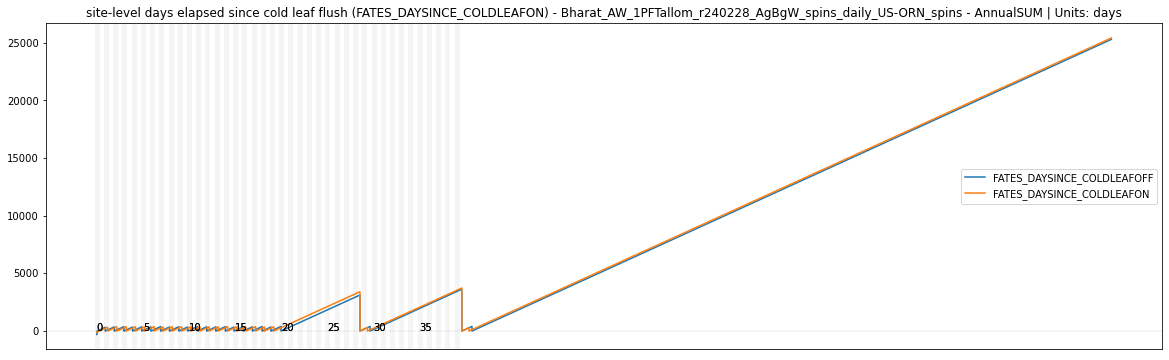

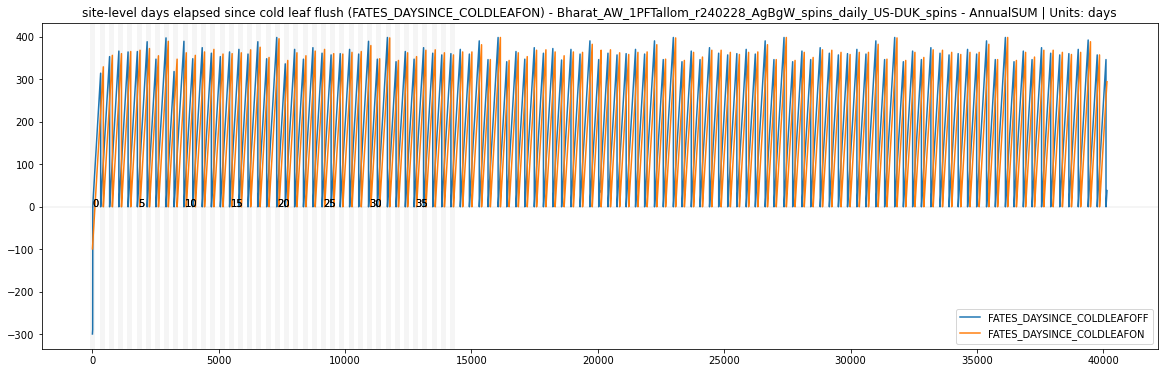

In [94]:
vars = ("FATES_DAYSINCE_COLDLEAFOFF",
        "FATES_DAYSINCE_COLDLEAFON",
        #"FATES_AUTORESP_USTORY"
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            #plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: days")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            #plt.xlim(0,max_r_years*365)
            #plt.ylim(-10,3500)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

total biomass in live plant sapwood in kg carbon per m2
total biomass in live plant fine roots in kg carbon per m2
total biomass in live plant sapwood in kg carbon per m2
total biomass in live plant fine roots in kg carbon per m2


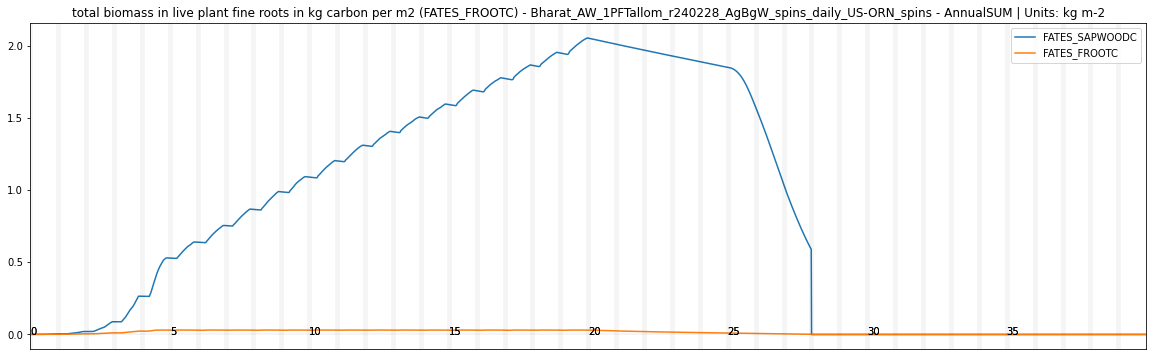

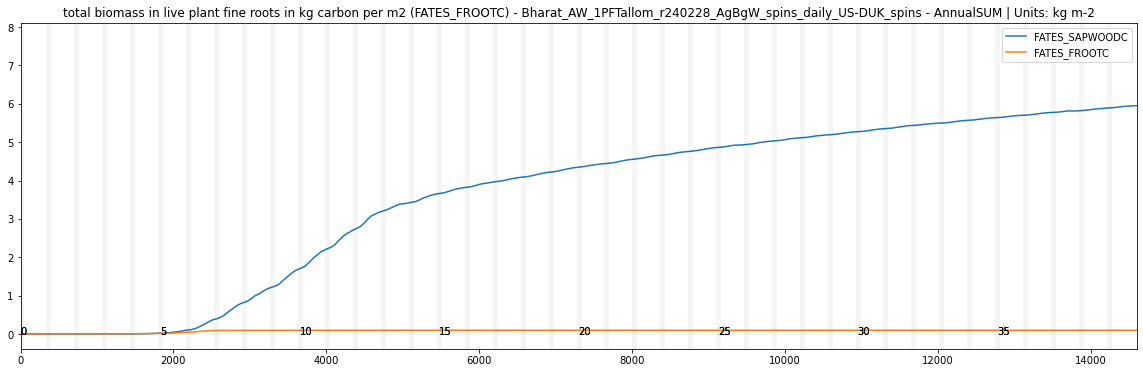

In [95]:
vars = ("FATES_SAPWOODC",
        "FATES_FROOTC"
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

Crown area of canopy trees that died
Crown aera of understory trees that died
Crown area of canopy trees that died
Crown aera of understory trees that died


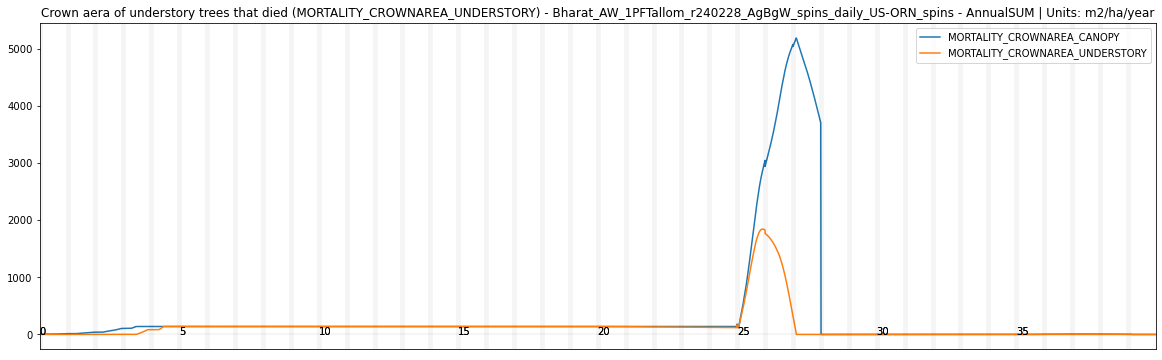

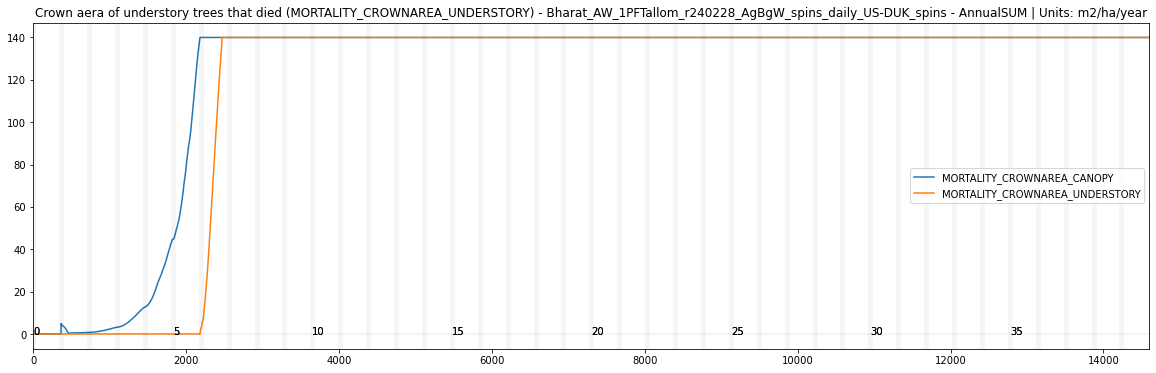

In [96]:
vars = ("MORTALITY_CROWNAREA_CANOPY",
        "MORTALITY_CROWNAREA_UNDERSTORY"
       )

for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

autotrophic respiration in kg carbon per m2 per second
autotrophic respiration of canopy plants in kg carbon per m2 per second
autotrophic respiration of understory plants in kg carbon per m2 per second
autotrophic respiration in kg carbon per m2 per second
autotrophic respiration of canopy plants in kg carbon per m2 per second
autotrophic respiration of understory plants in kg carbon per m2 per second


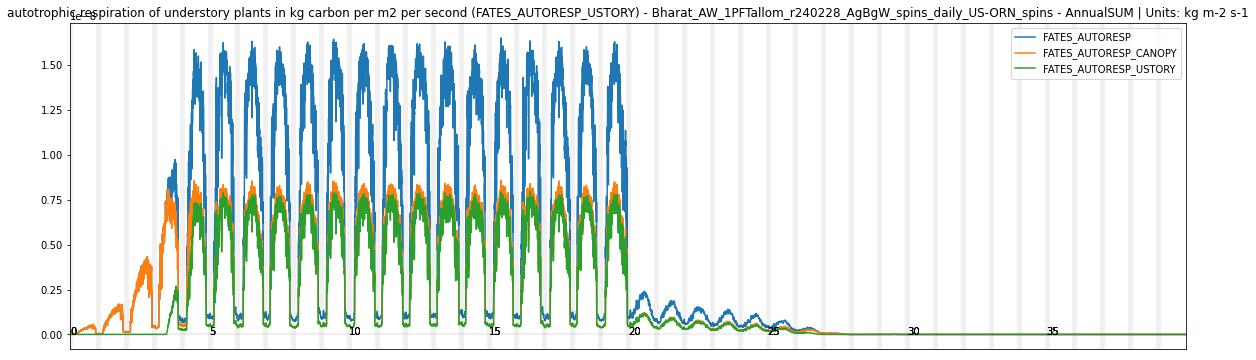

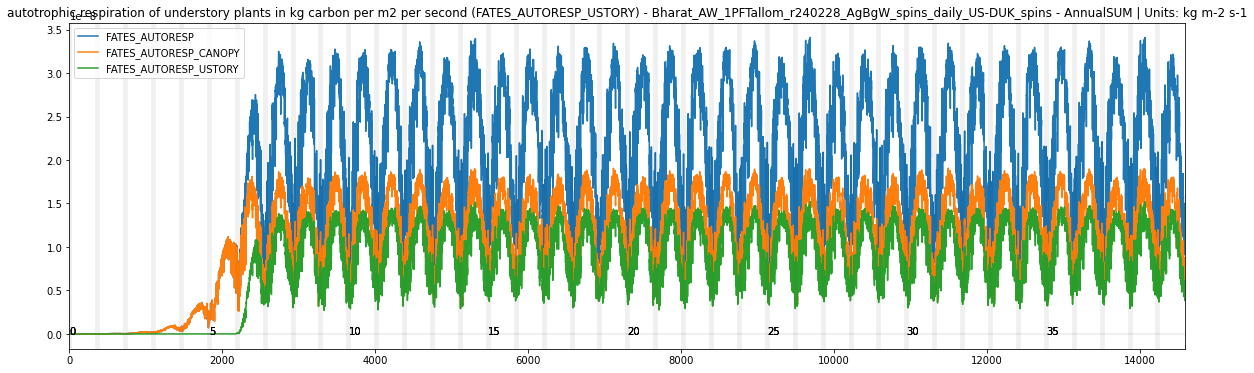

In [97]:
vars = ("FATES_AUTORESP",
        "FATES_AUTORESP_CANOPY",
        "FATES_AUTORESP_USTORY"
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

biomass of canopy plants in kg carbon per m2 land area
biomass of canopy plants in kg carbon per m2 land area


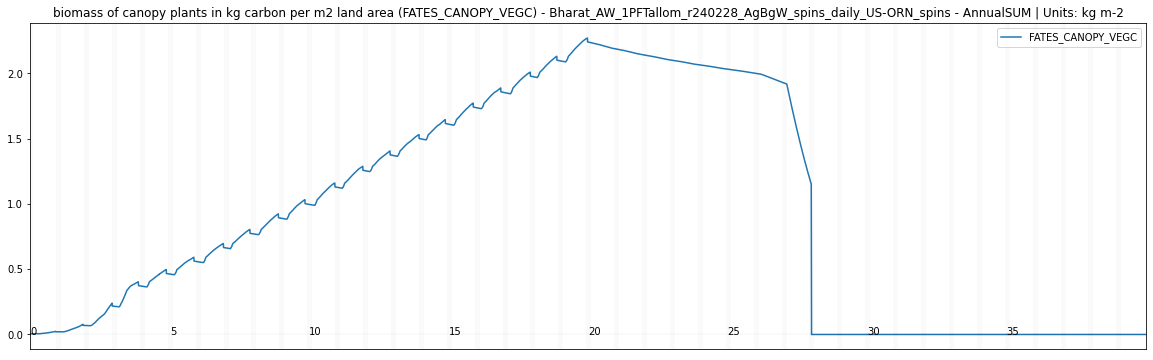

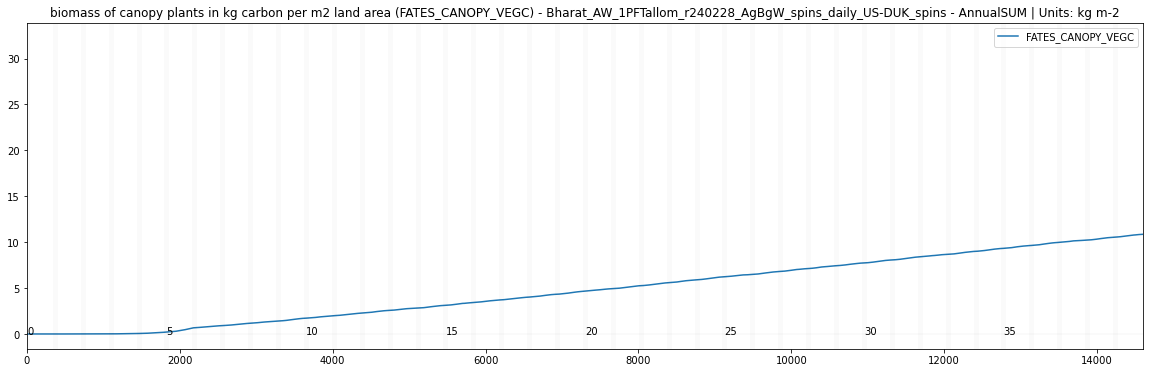

In [98]:
vars = ("FATES_CANOPY_VEGC",
        #"FATES_AUTORESP_CANOPY",
        #"FATES_AUTORESP_USTORY"
       )

for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

fates instantaneous mean vegetation temperature by site
fates 24-hr running mean vegetation temperature by site
fates instantaneous mean vegetation temperature by site
fates 24-hr running mean vegetation temperature by site


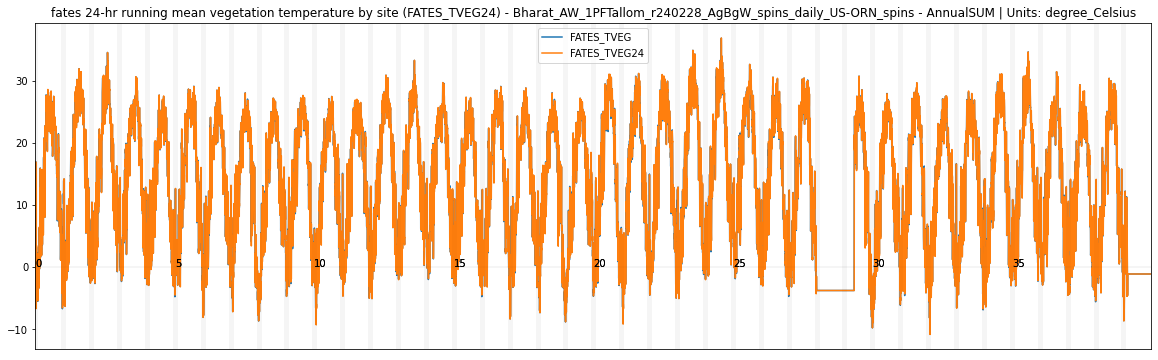

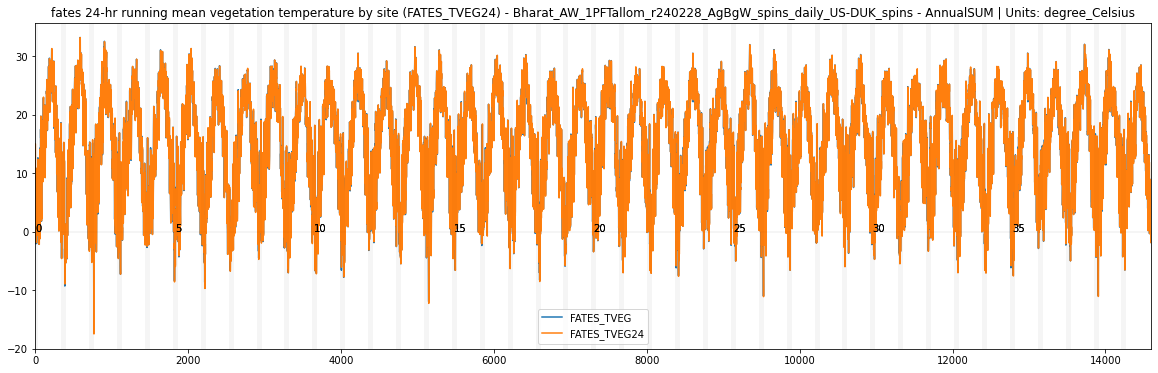

In [99]:
vars = ("FATES_TVEG",
        "FATES_TVEG24",
        #"FATES_AUTORESP_USTORY"
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

In [100]:
ds[key][var]


<xarray.DataArray 'FATES_TVEG24' (time: 40150, lndgrid: 1)>
dask.array<open_dataset-809a5ecbffa2d9bfb4bb0e1560493887FATES_TVEG24, shape=(40150, 1), dtype=float32, chunksize=(40150, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 4.015e+04 4.015e+04 4.015e+04
Dimensions without coordinates: lndgrid
Attributes:
    units:      degree_Celsius
    long_name:  fates 24-hr running mean vegetation temperature by site

autotrophic respiration in kg carbon per m2 per second
autotrophic respiration of canopy plants in kg carbon per m2 per second
growth respiration in kg carbon per m2 per second
autotrophic respiration in kg carbon per m2 per second
autotrophic respiration of canopy plants in kg carbon per m2 per second
growth respiration in kg carbon per m2 per second


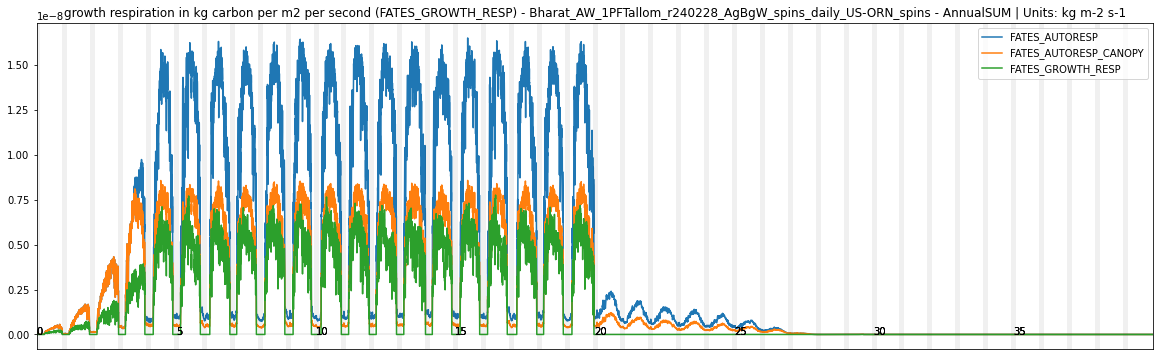

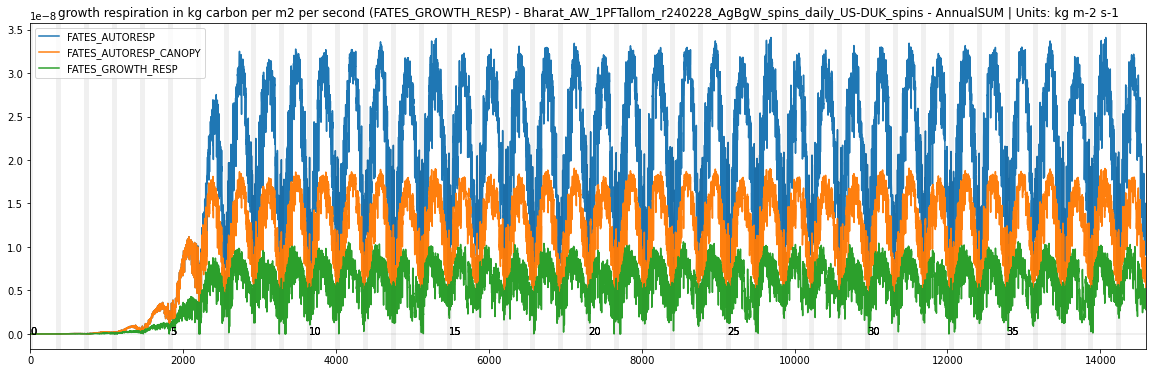

In [101]:
vars = ("FATES_AUTORESP",
        "FATES_AUTORESP_CANOPY",
        "FATES_GROWTH_RESP",
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue     
# Remarks: 

non-structural biomass (sapwood + leaf + fineroot) in kg carbon per m2
structural biomass in kg carbon per m2 land area
non-structural biomass (sapwood + leaf + fineroot) in kg carbon per m2
structural biomass in kg carbon per m2 land area


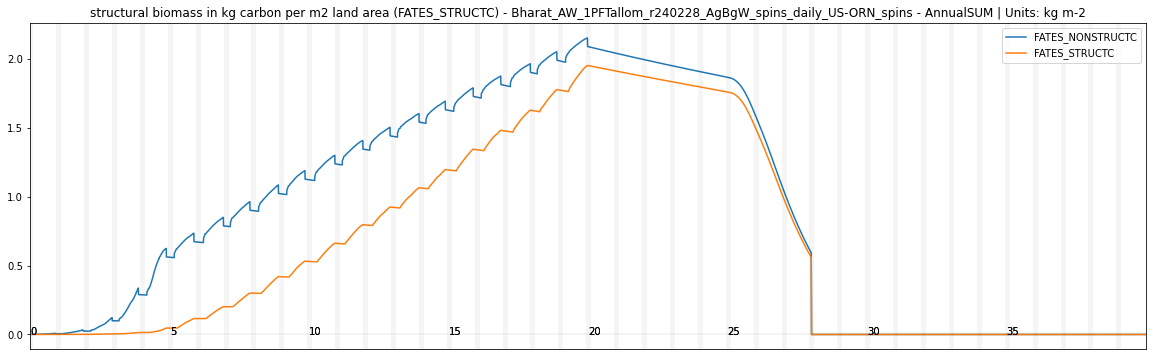

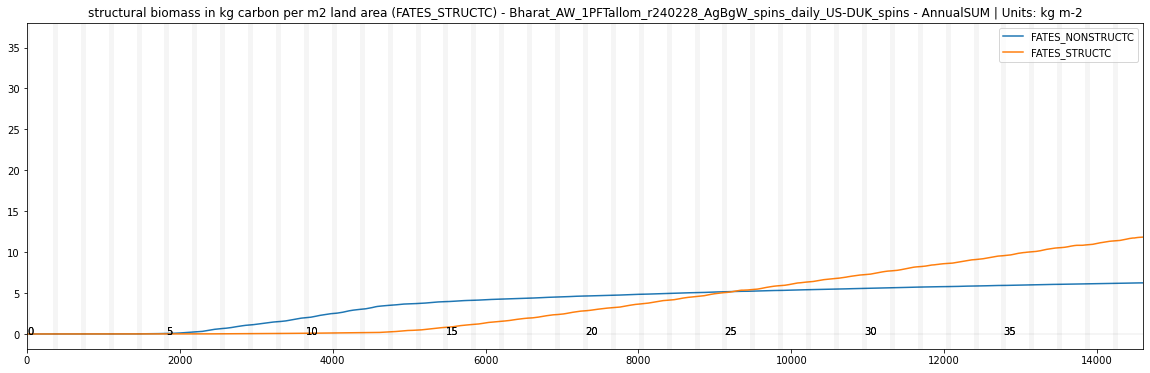

In [102]:
vars = ("FATES_NONSTRUCTC",
        "FATES_STRUCTC",
        #"FATES_GROWTH_RESP",
       )


for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            
            plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, int(i))
        except:
            continue
        
# Remarks: 

total biomass in live plant fine roots in kg carbon per m2
total biomass in live plant leaves in kg carbon per m2
total biomass in live plant storage in kg carbon per m2 land area
total biomass in live plant fine roots in kg carbon per m2
total biomass in live plant leaves in kg carbon per m2
total biomass in live plant storage in kg carbon per m2 land area


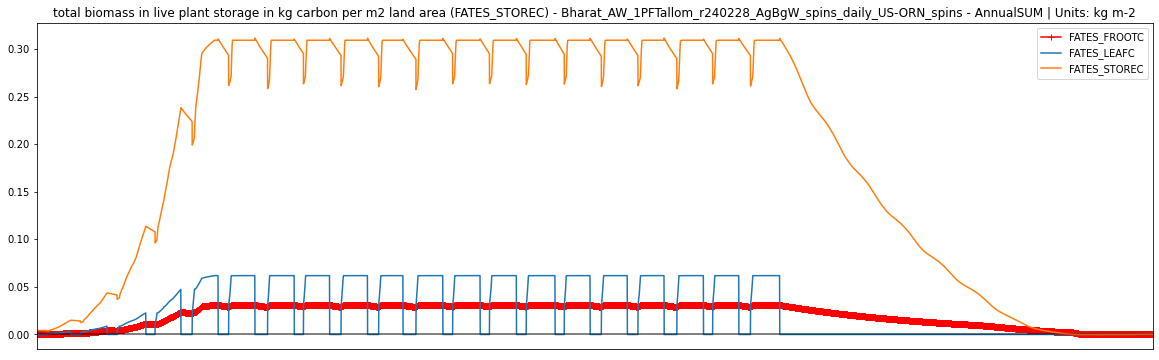

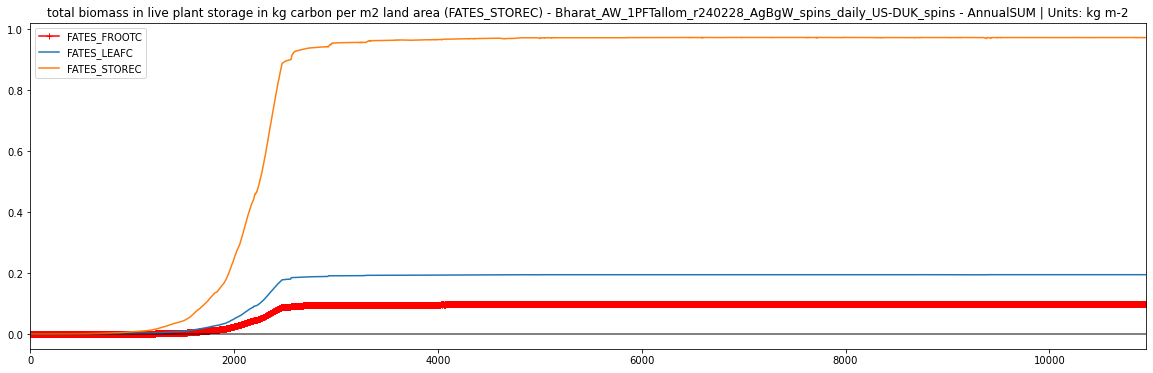

In [103]:
vars = (
    #"FATES_SAPWOODC",
        "FATES_FROOTC",
        "FATES_LEAFC",
        "FATES_STOREC",
        #"FATES_AUTORESP_USTORY"
       )

for idx, key in enumerate(ds.keys()):
    plt.figure(figsize=(20,6))
    for var in vars:
        try:
            if var == "FATES_FROOTC":
                plt.plot(ds[key][var], label = var, color='r', marker='+')
            else:
                pass
                plt.plot(ds[key][var], label = var)
            plt.title(f"{ds[key][var].long_name} ({var}) - {key} - AnnualSUM | Units: {ds[key][var].units}")
            #plt.axvline(x = 1982, color = 'r',lw=5, label = 'logging year', alpha=.2)
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.2)

            #plt.axvline(x = 1996, color = 'g',lw=5, label = 'logging year', alpha=.2)
            #plt.xlim(1850,2010)
            #plt.ylim(0,1.1)
            if idx != len(ds.keys())-1 : 
                plt.xticks([])
                plt.xlabel(None)
            print (ds[key][var].long_name )
            plt.legend()
            plt.xlim(0,30*365)
        except:
            continue
    

        
# Remarks: 